In [2]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gabib\Anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0




conda-4.8.3          | 2.8 MB    |            |   0% 
conda-4.8.3          | 2.8 MB    |            |   1% 
conda-4.8.3          | 2.8 MB    | 7          |   7% 
conda-4.8.3          | 2.8 MB    | ##1        |  22% 
conda-4.8.3          | 2.8 MB    | ####       |  41% 
conda-4.8.3          | 2.8 MB    | #####6     |  56% 
conda-4.8.3          | 2.8 MB    | #######2   |  73% 
conda-

In [7]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

# Datos del porcentaje de defunciones por suicidio

In [8]:
path = 'Porcentaje de defunciones por suicidio .csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aguascalientes,8.9,16.1,19.8,19.8,19.0,21.2,20.7,21.9,20.0
1,Baja California,3.7,7.0,5.7,5.6,8.5,6.5,6.4,5.3,5.2
2,Baja California Sur,14.3,9.2,13.0,15.2,15.2,12.4,11.0,4.9,12.0
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2
4,Coahuila de Zaragoza,9.6,8.1,6.4,9.0,9.3,12.2,12.1,14.5,16.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
Entidad Federativa    32 non-null object
2010                  32 non-null float64
2011                  32 non-null float64
2012                  32 non-null float64
2013                  32 non-null float64
2014                  32 non-null float64
2015                  32 non-null float64
2016                  32 non-null float64
2017                  32 non-null float64
2018                  32 non-null float64
dtypes: float64(9), object(1)
memory usage: 2.6+ KB


In [10]:
df.shape

(32, 10)

In [11]:
df.shape[0]

32

In [12]:
df.shape[1]

10

In [13]:
df.columns.values.tolist()

['Entidad Federativa',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [14]:
df.dtypes

Entidad Federativa     object
2010                  float64
2011                  float64
2012                  float64
2013                  float64
2014                  float64
2015                  float64
2016                  float64
2017                  float64
2018                  float64
dtype: object

In [15]:
df.isnull().any().any()

False

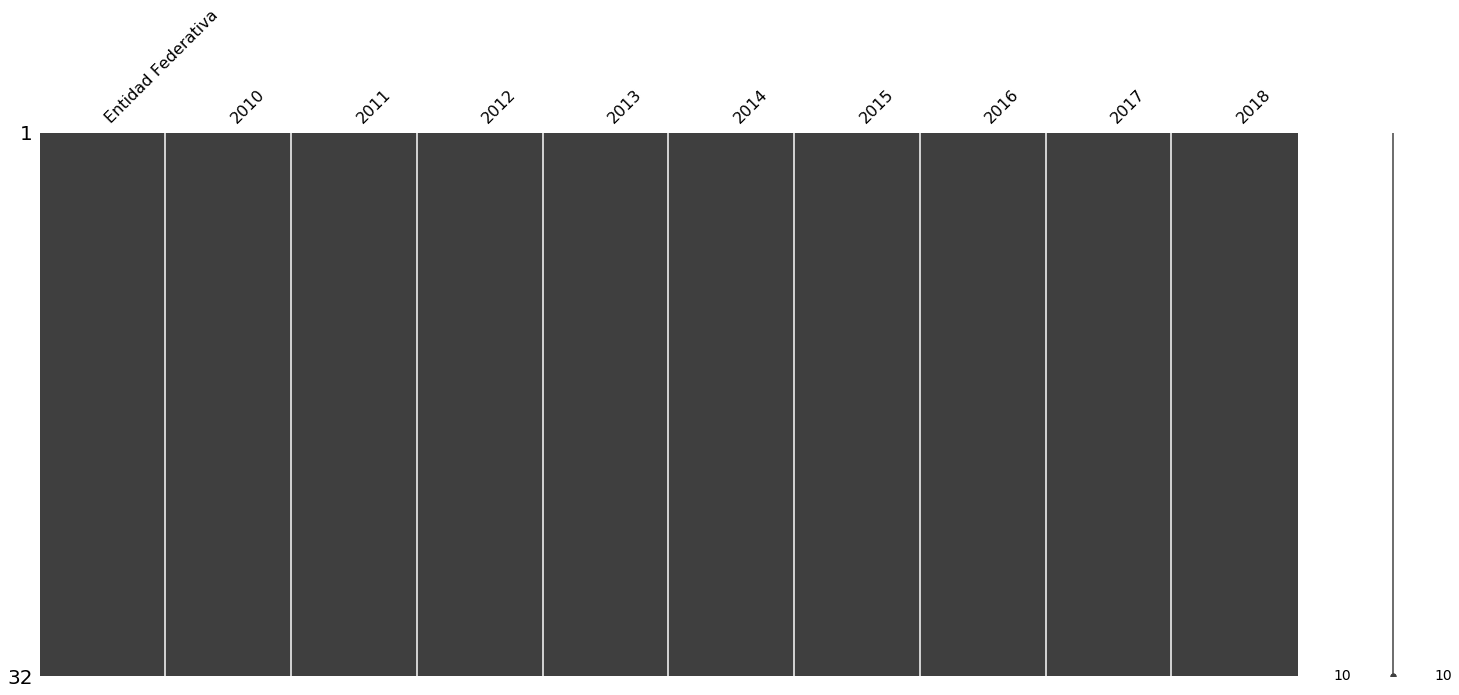

In [16]:
msno.matrix(df)

In [17]:
df.replace({' ': np.nan}, inplace=True)

In [18]:
df.isnull().any().any()

False

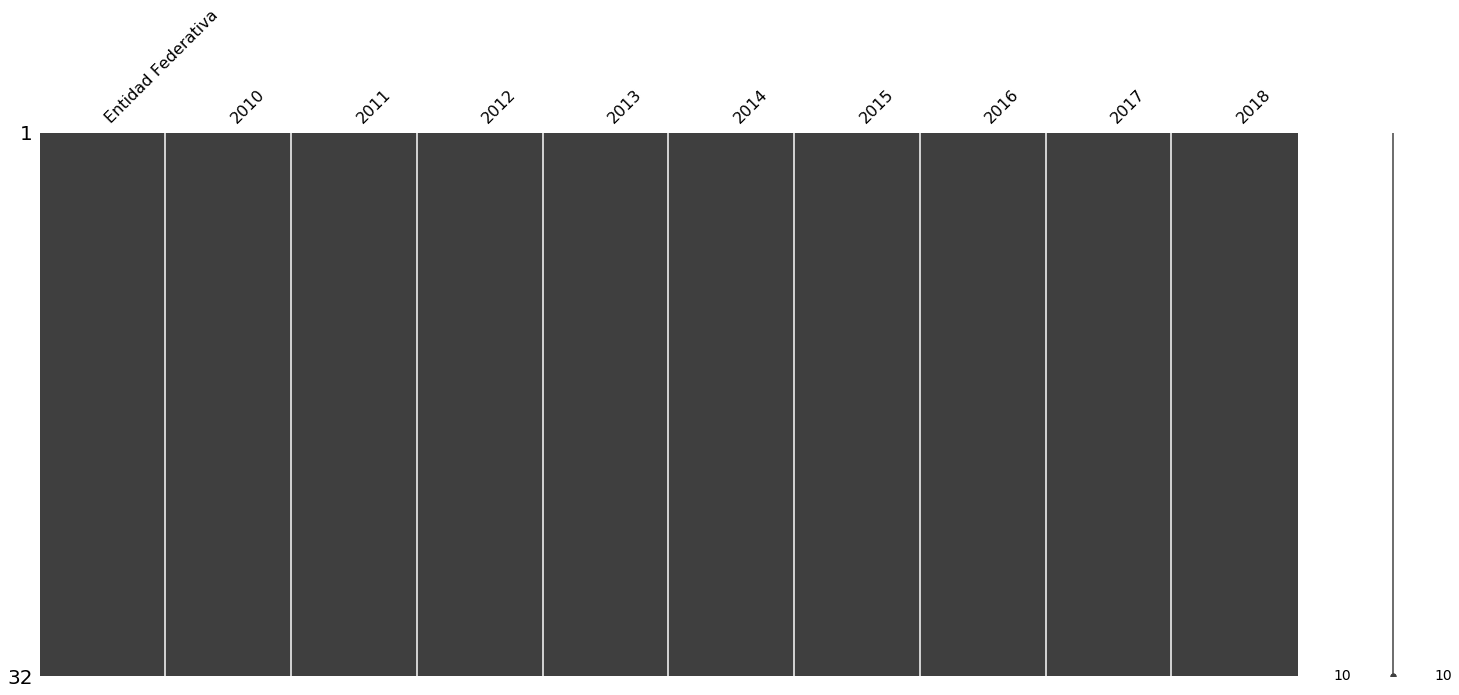

In [19]:
msno.matrix(df)

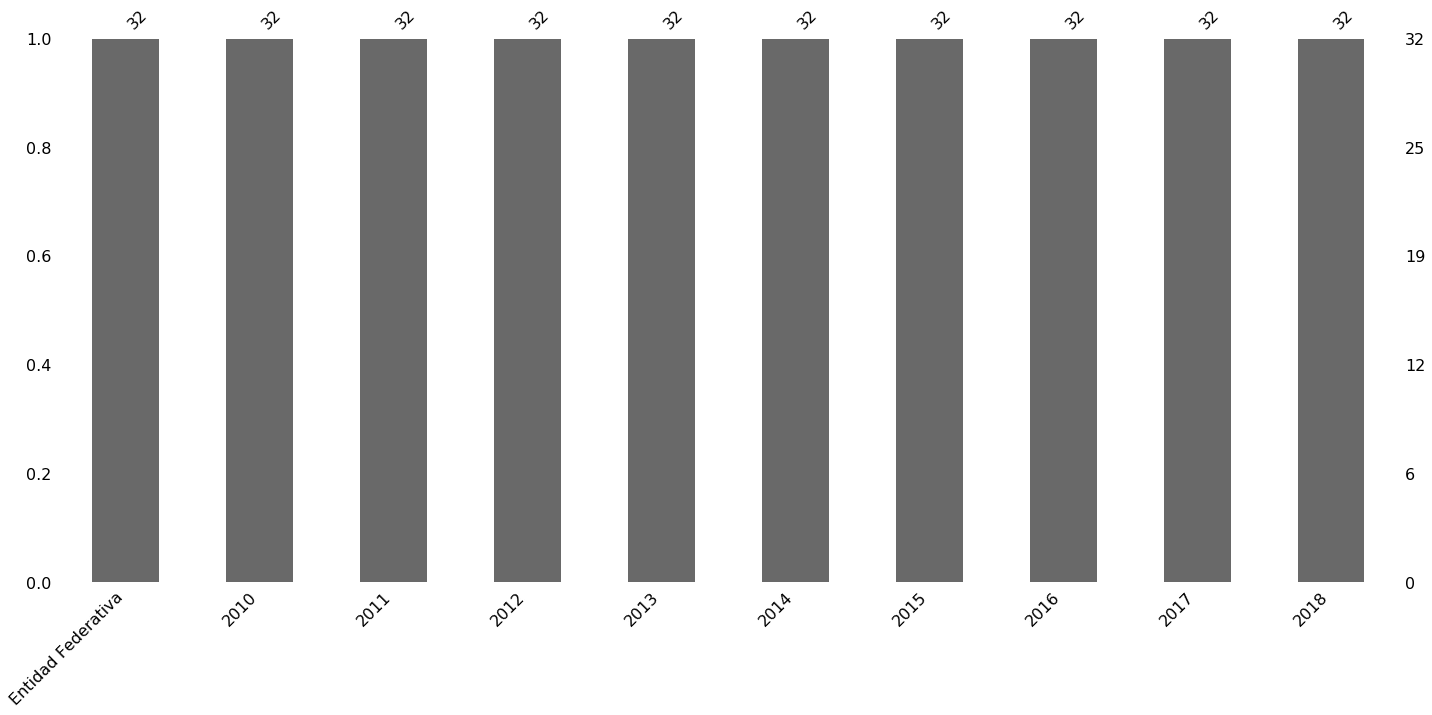

In [20]:
msno.bar(df)

In [28]:
df.loc[[0]]

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aguascalientes,8.9,16.1,19.8,19.8,19.0,21.2,20.7,21.9,20.0


In [35]:
df["2018"].loc[[0]]

0    20.0
Name: 2018, dtype: float64

In [38]:
df[["2010", "2018"]].loc[[0]]

,2010,2018
0,8.9,20.0


In [39]:
df.loc[30:33]

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
30,Yucatán,26.1,24.0,20.9,23.2,22.7,23.5,26.3,24.0,27.0
31,Zacatecas,4.9,7.4,4.2,4.9,7.0,8.6,5.3,7.3,6.7


In [43]:
df.drop([0,2,5], axis=0).head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Baja California,3.7,7.0,5.7,5.6,8.5,6.5,6.4,5.3,5.2
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2
4,Coahuila de Zaragoza,9.6,8.1,6.4,9.0,9.3,12.2,12.1,14.5,16.7
6,Chiapas,3.8,10.0,8.3,14.5,15.2,14.4,13.1,13.1,9.5
7,Chihuahua,2.6,4.2,5.4,7.4,8.8,11.4,11.2,9.6,9.5


In [42]:
df.drop(df.index[1:5], axis=0).head(10)

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aguascalientes,8.9,16.1,19.8,19.8,19.0,21.2,20.7,21.9,20.0
5,Colima,7.8,10.1,7.6,10.1,9.7,9.9,6.9,4.6,5.4
6,Chiapas,3.8,10.0,8.3,14.5,15.2,14.4,13.1,13.1,9.5
7,Chihuahua,2.6,4.2,5.4,7.4,8.8,11.4,11.2,9.6,9.5
8,Ciudad de México,10.6,11.2,11.5,10.5,11.0,9.1,8.9,7.8,6.0
9,Durango,4.5,4.2,4.4,6.2,8.5,10.1,9.5,11.6,13.0
10,Guanajuato,11.1,12.8,11.5,12.4,14.6,13.8,12.5,10.6,8.9
11,Guerrero,3.1,2.2,2.2,2.8,2.7,1.9,2.2,2.0,2.0
12,Hidalgo,4.8,7.9,8.2,8.7,9.4,9.0,8.2,8.0,7.9
13,Jalisco,9.5,9.6,10.4,10.2,11.6,11.8,12.4,13.1,11.4


In [44]:
df[20:].head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
20,Puebla,8.4,9.3,7.8,8.8,9.7,9.4,7.7,9.5,10.4
21,Querétaro,10.2,11.3,12.4,12.9,9.1,11.9,11.4,13.6,14.0
22,Quintana Roo,18.7,17.2,18.3,19.0,18.2,18.3,15.5,13.4,9.1
23,San Luis Potosí,11.4,11.5,10.2,11.5,12.0,12.5,12.3,11.7,11.7
24,Sinaloa,2.8,3.0,3.3,4.5,5.4,5.5,5.9,5.6,5.5


In [45]:
df[['2010', "2018"]].values

array([[ 8.9, 20. ],
       [ 3.7,  5.2],
       [14.3, 12. ],
       [15.7, 15.2],
       [ 9.6, 16.7],
       [ 7.8,  5.4],
       [ 3.8,  9.5],
       [ 2.6,  9.5],
       [10.6,  6. ],
       [ 4.5, 13. ],
       [11.1,  8.9],
       [ 3.1,  2. ],
       [ 4.8,  7.9],
       [ 9.5, 11.4],
       [ 7.5,  7. ],
       [ 5. ,  6.2],
       [ 4.3,  6. ],
       [ 4.5,  7.4],
       [ 9.5, 12.8],
       [ 5.8,  6.3],
       [ 8.4, 10.4],
       [10.2, 14. ],
       [18.7,  9.1],
       [11.4, 11.7],
       [ 2.8,  5.5],
       [ 8.5, 12.3],
       [12.3, 10.4],
       [ 7.1,  7.2],
       [ 7.3,  9.4],
       [ 7.5,  6.9],
       [26.1, 27. ],
       [ 4.9,  6.7]])

In [48]:
df['2010'].unique()

array([ 8.9,  3.7, 14.3, 15.7,  9.6,  7.8,  3.8,  2.6, 10.6,  4.5, 11.1,
        3.1,  4.8,  9.5,  7.5,  5. ,  4.3,  5.8,  8.4, 10.2, 18.7, 11.4,
        2.8,  8.5, 12.3,  7.1,  7.3, 26.1,  4.9])

In [50]:
df['2010'].nunique()

29

In [51]:
df['2010'].value_counts()

4.5     2
9.5     2
7.5     2
15.7    1
5.0     1
8.5     1
11.4    1
10.6    1
14.3    1
18.7    1
3.1     1
2.8     1
12.3    1
11.1    1
7.8     1
5.8     1
7.3     1
4.9     1
10.2    1
8.4     1
7.1     1
26.1    1
4.8     1
2.6     1
4.3     1
3.7     1
9.6     1
8.9     1
3.8     1
Name: 2010, dtype: int64

In [59]:
df.agg(['count', 'size', 'nunique'])

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,32,32,32,32,32,32,32,32,32,32
size,32,32,32,32,32,32,32,32,32,32
nunique,32,29,29,28,31,27,30,32,30,29


In [60]:
df.groupby('Entidad Federativa').agg(['count', 'size', 'nunique']).stack()

2010  2011  2012  2013  2014  2015  2016  2017  \
Entidad Federativa                                                           
Aguascalientes     count       1     1     1     1     1     1     1     1   
                   size        1     1     1     1     1     1     1     1   
                   nunique     1     1     1     1     1     1     1     1   
Baja California    count       1     1     1     1     1     1     1     1   
                   size        1     1     1     1     1     1     1     1   
...                          ...   ...   ...   ...   ...   ...   ...   ...   
Yucatán            size        1     1     1     1     1     1     1     1   
                   nunique     1     1     1     1     1     1     1     1   
Zacatecas          count       1     1     1     1     1     1     1     1   
                   size        1     1     1     1     1     1     1     1   
                   nunique     1     1     1     1     1     1     1     1   

                            2018  
Entidad Federativa                
Aguascalientes     count       1  
                   size        1  
                   nunique     1  
Baja California    count       1  
                   size        1  
...                          ...  
Yucatán            size        1  
                   nunique     1  
Zacatecas          count       1  
                   size        1  
                   nunique     1  

[96 rows x 9 columns]

In [61]:
df.groupby('Entidad Federativa').agg(['count', 'size', 'nunique'])

2010               2011               2012  \
                                count size nunique count size nunique count   
Entidad Federativa                                                            
Aguascalientes                      1    1       1     1    1       1     1   
Baja California                     1    1       1     1    1       1     1   
Baja California Sur                 1    1       1     1    1       1     1   
Campeche                            1    1       1     1    1       1     1   
Chiapas                             1    1       1     1    1       1     1   
Chihuahua                           1    1       1     1    1       1     1   
Ciudad de México                    1    1       1     1    1       1     1   
Coahuila de Zaragoza                1    1       1     1    1       1     1   
Colima                              1    1       1     1    1       1     1   
Durango                             1    1       1     1    1       1     1   
Guanajuato                          1    1       1     1    1       1     1   
Guerrero                            1    1       1     1    1       1     1   
Hidalgo                             1    1       1     1    1       1     1   
Jalisco                             1    1       1     1    1       1     1   
Michoacán de Ocampo                 1    1       1     1    1       1     1   
Morelos                             1    1       1     1    1       1     1   
México                              1    1       1     1    1       1     1   
Nayarit                             1    1       1     1    1       1     1   
Nuevo León                          1    1       1     1    1       1     1   
Oaxaca                              1    1       1     1    1       1     1   
Puebla                              1    1       1     1    1       1     1   
Querétaro                           1    1       1     1    1       1     1   
Quintana Roo                        1    1       1     1    1       1     1   
San Luis Potosí                     1    1       1     1    1       1     1   
Sinaloa                             1    1       1     1    1       1     1   
Sonora                              1    1       1     1    1       1     1   
Tabasco                             1    1       1     1    1       1     1   
Tamaulipas                          1    1       1     1    1       1     1   
Tlaxcala                            1    1       1     1    1       1     1   
Veracruz de Ignacio de la Llave     1    1       1     1    1       1     1   
Yucatán                             1    1       1     1    1       1     1   
Zacatecas                           1    1       1     1    1       1     1   

                                              2013  ...    2015  2016       \
                                size nunique count  ... nunique count size   
Entidad Federativa                                  ...                      
Aguascalientes                     1       1     1  ...       1     1    1   
Baja California                    1       1     1  ...       1     1    1   
Baja California Sur                1       1     1  ...       1     1    1   
Campeche                           1       1     1  ...       1     1    1   
Chiapas                            1       1     1  ...       1     1    1   
Chihuahua                          1       1     1  ...       1     1    1   
Ciudad de México                   1       1     1  ...       1     1    1   
Coahuila de Zaragoza               1       1     1  ...       1     1    1   
Colima                             1       1     1  ...       1     1    1   
Durango                            1       1     1  ...       1     1    1   
Guanajuato                         1       1     1  ...       1     1    1   
Guerrero                           1       1     1  ...       1     1    1   
Hidalgo                            1       1     1  ...       1     1    1   
Jalisco            

In [62]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
27,Tamaulipas,7.1,6.0,5.6,7.2,7.3,7.0,7.0,6.3,7.2
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2


In [63]:
df.shape

(32, 10)

In [64]:
df_sample.shape

(2, 10)

## Data transform

In [65]:
df_dropped = df.dropna(subset=['2010'])
df_dropped.head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aguascalientes,8.9,16.1,19.8,19.8,19.0,21.2,20.7,21.9,20.0
1,Baja California,3.7,7.0,5.7,5.6,8.5,6.5,6.4,5.3,5.2
2,Baja California Sur,14.3,9.2,13.0,15.2,15.2,12.4,11.0,4.9,12.0
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2
4,Coahuila de Zaragoza,9.6,8.1,6.4,9.0,9.3,12.2,12.1,14.5,16.7


In [66]:
df_dropped.shape

(32, 10)

In [67]:
df_copy = df.copy()
df_copy.head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aguascalientes,8.9,16.1,19.8,19.8,19.0,21.2,20.7,21.9,20.0
1,Baja California,3.7,7.0,5.7,5.6,8.5,6.5,6.4,5.3,5.2
2,Baja California Sur,14.3,9.2,13.0,15.2,15.2,12.4,11.0,4.9,12.0
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2
4,Coahuila de Zaragoza,9.6,8.1,6.4,9.0,9.3,12.2,12.1,14.5,16.7


In [68]:
df_copy.shape

(32, 10)

In [69]:
df_dropped['2018'].dtype

dtype('float64')

In [70]:
df_dropped['2018'].mean() 

9.968749999999998

In [71]:
df_copy['2018'].fillna(value=np.round(df['2018'].mean(),decimals=0), inplace=True)

In [72]:
df_copy.agg(['count', 'size', 'nunique'])

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,32,32,32,32,32,32,32,32,32,32
size,32,32,32,32,32,32,32,32,32,32
nunique,32,29,29,28,31,27,30,32,30,29


## Handling Categorical Data

In [96]:
list(df['Entidad Federativa'].unique())

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila de Zaragoza',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'México',
 'Michoacán de Ocampo',
 'Morelos',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

In [97]:
list(df['Entidad Federativa'].unique())

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila de Zaragoza',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'México',
 'Michoacán de Ocampo',
 'Morelos',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

In [98]:
keys = list(df['Entidad Federativa'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Aguascalientes': 1,
 'Baja California': 2,
 'Baja California Sur': 3,
 'Campeche': 4,
 'Coahuila de Zaragoza': 5,
 'Colima': 6,
 'Chiapas': 7}

In [99]:
df_copy['ef_cat'] = df['Entidad Federativa'].map(act)
df_copy.head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018,ef_cat
0,Aguascalientes,8.9,16.1,19.8,19.8,19.0,21.2,20.7,21.9,20.0,1.0
1,Baja California,3.7,7.0,5.7,5.6,8.5,6.5,6.4,5.3,5.2,2.0
2,Baja California Sur,14.3,9.2,13.0,15.2,15.2,12.4,11.0,4.9,12.0,3.0
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2,4.0
4,Coahuila de Zaragoza,9.6,8.1,6.4,9.0,9.3,12.2,12.1,14.5,16.7,5.0


In [101]:
list(df_copy['ef_cat'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan]

## Data Summarization

In [102]:
df_copy['2018'].mean()

9.968749999999998

In [105]:
df_copy['2010'][df_copy['Entidad Federativa'] == 6]

Series([], Name: 2010, dtype: float64)

In [106]:
df_copy['2010'][df_copy['ef_cat'] == 6].mean()

7.8

In [107]:
df_copy.groupby(["ef_cat", "2010", "2015", "2018"]).count()

,,,,Entidad Federativa,2011,2012,2013,2014,2016,2017
ef_cat,2010,2015,2018,,,,,,,
1.0,8.9,21.2,20.0,1,1,1,1,1,1,1
2.0,3.7,6.5,5.2,1,1,1,1,1,1,1
3.0,14.3,12.4,12.0,1,1,1,1,1,1,1
4.0,15.7,19.7,15.2,1,1,1,1,1,1,1
5.0,9.6,12.2,16.7,1,1,1,1,1,1,1
6.0,7.8,9.9,5.4,1,1,1,1,1,1,1
7.0,3.8,14.4,9.5,1,1,1,1,1,1,1


In [109]:
df_copy.groupby(["Entidad Federativa", "2010"])[["2015", "2018"]].count()

,,2015,2018
Entidad Federativa,2010,,
Aguascalientes,8.9,1,1
Baja California,3.7,1,1
Baja California Sur,14.3,1,1
Campeche,15.7,1,1
Chiapas,3.8,1,1
Chihuahua,2.6,1,1
Ciudad de México,10.6,1,1
Coahuila de Zaragoza,9.6,1,1
Colima,7.8,1,1


In [110]:
df_copy["Entidad Federativa"]

0                      Aguascalientes
1                     Baja California
2                 Baja California Sur
3                            Campeche
4                Coahuila de Zaragoza
5                              Colima
6                             Chiapas
7                           Chihuahua
8                    Ciudad de México
9                             Durango
10                         Guanajuato
11                           Guerrero
12                            Hidalgo
13                            Jalisco
14                             México
15                Michoacán de Ocampo
16                            Morelos
17                            Nayarit
18                         Nuevo León
19                             Oaxaca
20                             Puebla
21                          Querétaro
22                       Quintana Roo
23                    San Luis Potosí
24                            Sinaloa
25                             Sonora
26          

In [122]:
df_sample = df.sample(frac=0.09, random_state=1)
df_sample.head()

,Entidad Federativa,2010,2011,2012,2013,2014,2015,2016,2017,2018
27,Tamaulipas,7.1,6.0,5.6,7.2,7.3,7.0,7.0,6.3,7.2
3,Campeche,15.7,20.1,13.6,18.9,19.9,19.7,19.8,16.5,15.2
22,Quintana Roo,18.7,17.2,18.3,19.0,18.2,18.3,15.5,13.4,9.1


In [123]:
df_sample.groupby(["Entidad Federativa", "2010"])[["2015", "2018"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

2015                      2018                    
                          sum  mean count_nonzero   sum  mean count_nonzero
Entidad Federativa 2010                                                    
Campeche           15.7  19.7  19.7           1.0  15.2  15.2           1.0
Quintana Roo       18.7  18.3  18.3           1.0   9.1   9.1           1.0
Tamaulipas         7.1    7.0   7.0           1.0   7.2   7.2           1.0

In [124]:
df_sample.groupby(["Entidad Federativa", "2010"]).agg({'2015':np.mean,'2018':np.max})

,,2015,2018
Entidad Federativa,2010,,
Campeche,15.7,19.7,15.2
Quintana Roo,18.7,18.3,9.1
Tamaulipas,7.1,7.0,7.2


## Data Visualization

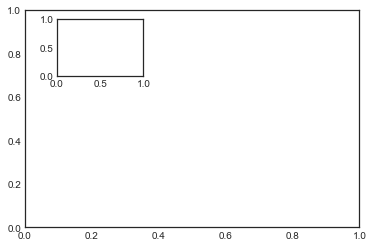

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.20, 0.65, 0.2, 0.2])

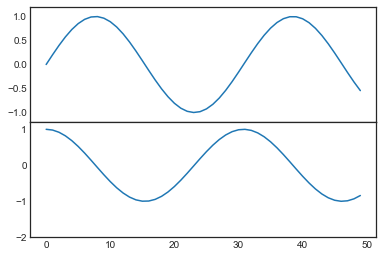

In [87]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

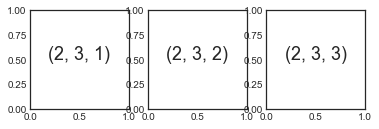

In [89]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

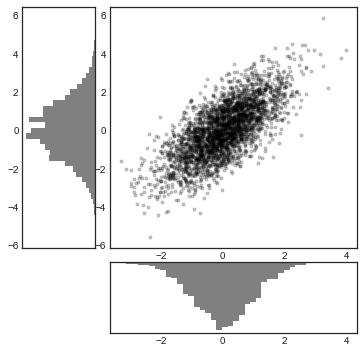

In [90]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

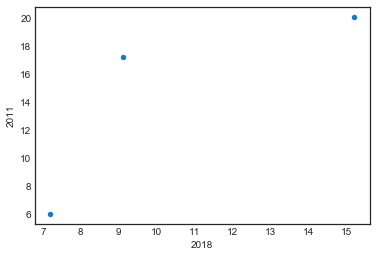

In [125]:
df_sample['2018'] = df_sample['2018'].astype('float64')

df_sample.plot(kind='scatter',x='2018',y='2011')

### Histograms

Text(0.5, 1.0, 'Frecuencia de 2018')

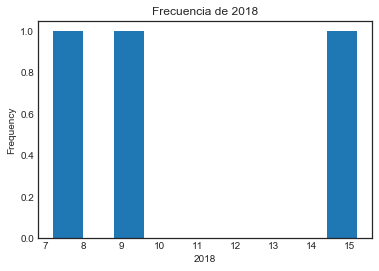

In [128]:
plt.hist(df_sample['2018'])
plt.xlabel('2018')
plt.ylabel('Frequency')
plt.title('Frecuencia de 2018')

Text(0.5, 1.0, 'Frecuencia de 2015')

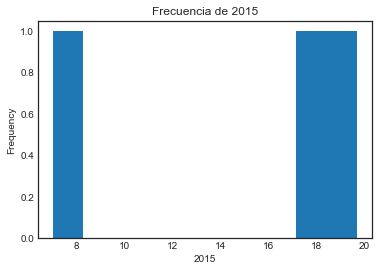

In [130]:
plt.hist(df_sample['2015'])
plt.xlabel('2015')
plt.ylabel('Frequency')
plt.title('Frecuencia de 2015')

### Bloxplots

Text(0.5, 1.0, 'Box Plot of 2018 count')

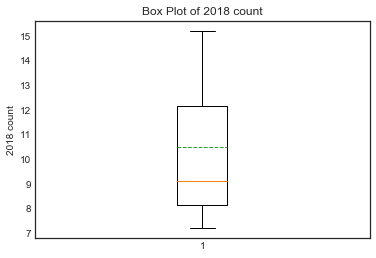

In [132]:
plt.boxplot(df_sample['2018'], showmeans=True, meanline=True)
plt.ylabel('2018 count')
plt.title('Box Plot of 2018 count')

# Datos de la tasa de abandono escolar en el año 2018-2019

In [133]:
path1 = 'Tasa de abandono escolar 2018-19.csv'
df1 = pd.read_csv(path1)
df1.head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
0,Aguascalientes,0.1,5.8,12.4,7.5
1,Baja California,0.4,4.4,13.0,6.4
2,Baja California Sur,- 0.3,2.6,11.0,12.7
3,Campeche,1.2,5.0,11.9,10.3
4,Coahuila de Zaragoza,0.2,3.5,13.6,7.4


In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
Entidad federativa    32 non-null object
Primaria              32 non-null object
Secundaria            32 non-null float64
Media superior        32 non-null float64
Superior              32 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.4+ KB


In [135]:
df1.shape

(32, 5)

In [136]:
df1.shape[0]

32

In [137]:
df1.shape[1]

5

In [138]:
df1.columns.values.tolist()

['Entidad federativa', 'Primaria', 'Secundaria', 'Media superior', 'Superior']

In [139]:
df1.dtypes

Entidad federativa     object
Primaria               object
Secundaria            float64
Media superior        float64
Superior              float64
dtype: object

In [140]:
df1.isnull().any().any()

False

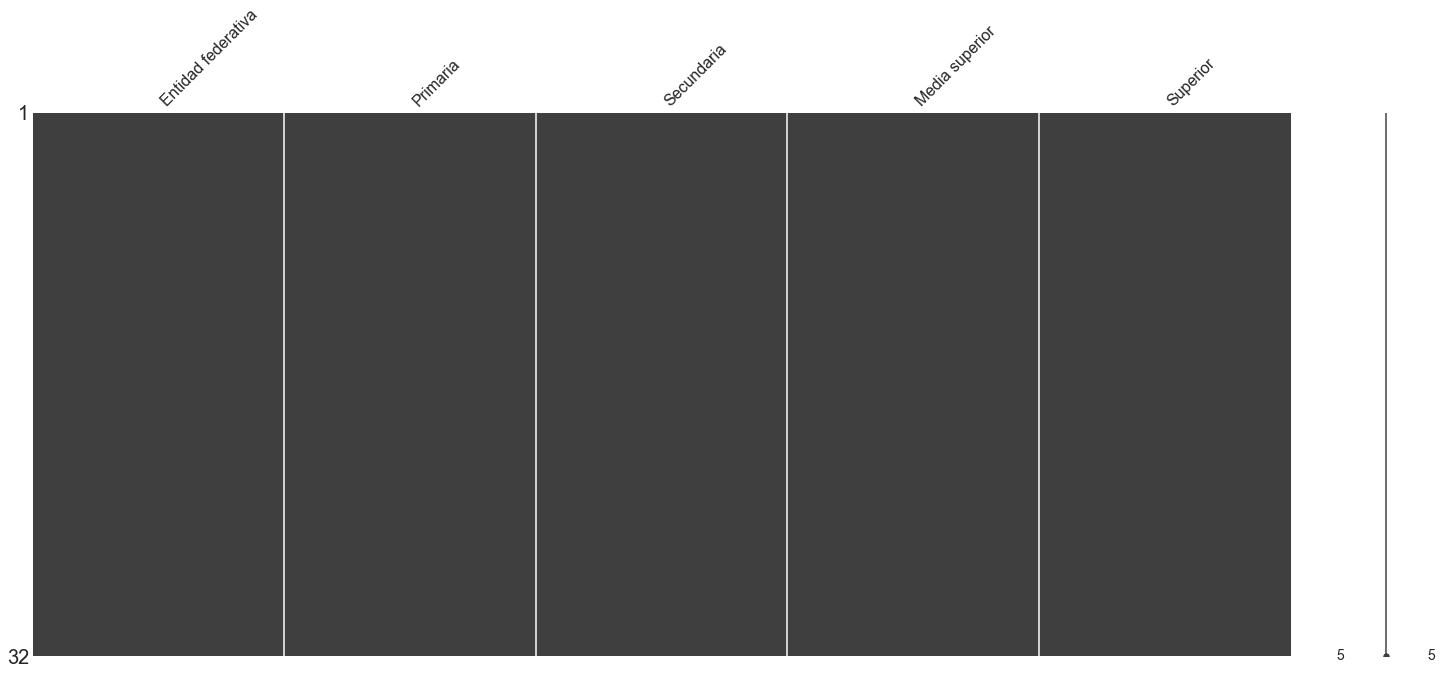

In [141]:
msno.matrix(df1)

In [142]:
df1.replace({' ': np.nan}, inplace=True)

In [143]:
df1.isnull().any().any()

False

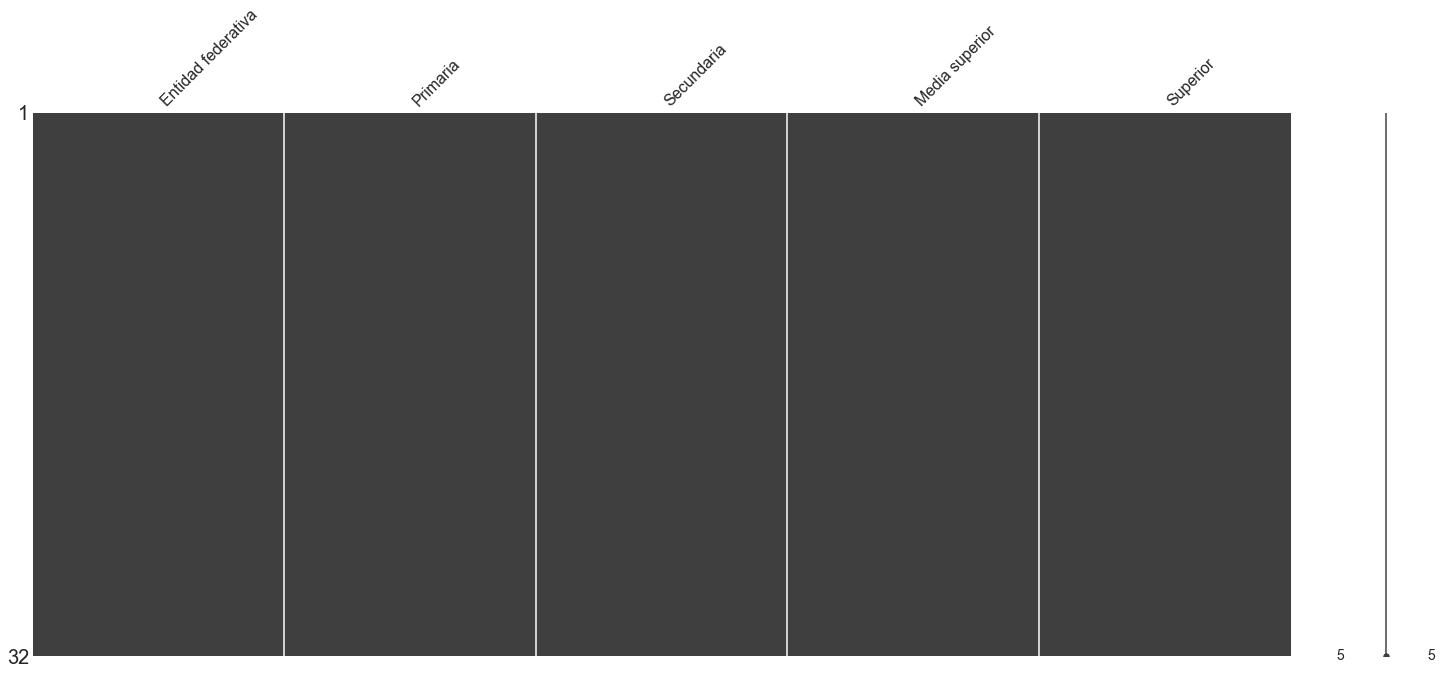

In [144]:
msno.matrix(df1)

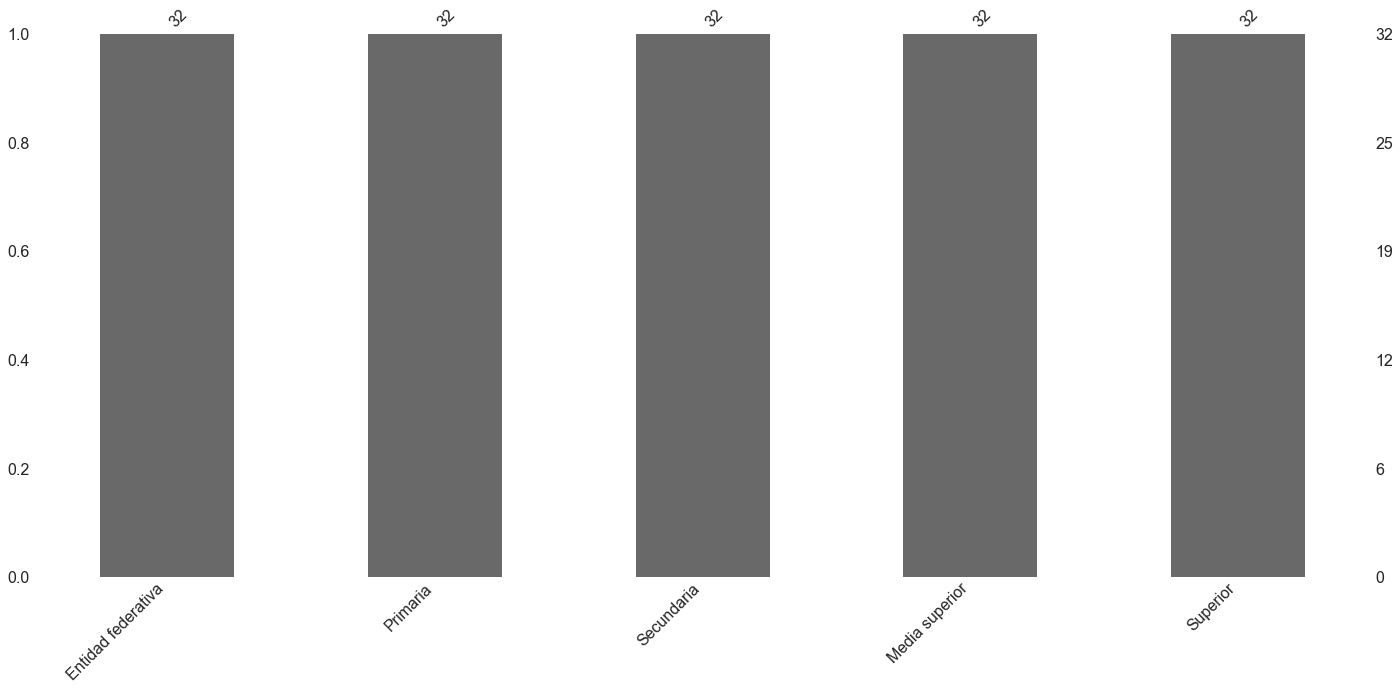

In [145]:
msno.bar(df1)

In [146]:
df1.columns[df1.isnull().any()].tolist()

[]

In [147]:
df1.describe()

,Secundaria,Media superior,Superior
count,32.000000,32.000000,32.000000
mean,4.618750,12.606250,8.346875
std,1.297998,2.535164,3.372372
min,2.600000,8.100000,0.400000
25%,3.850000,11.075000,6.875000
50%,4.400000,12.300000,8.650000
75%,5.075000,13.950000,10.350000
max,8.500000,19.800000,14.200000


In [148]:
df1.loc[[0]]

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
0,Aguascalientes,0.1,5.8,12.4,7.5


In [151]:
df1['Secundaria'].loc[[28]]

28    3.9
Name: Secundaria, dtype: float64

In [152]:
df1.Secundaria.loc[[0]]

0    5.8
Name: Secundaria, dtype: float64

In [155]:
df1[["Entidad federativa", "Primaria"]].loc[[0]]

,Entidad federativa,Primaria
0,Aguascalientes,0.1


In [156]:
df1.loc[30:33]

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
30,Yucatán,0.2,4.2,12.2,8.8
31,Zacatecas,0.4,5.9,12.5,10.9


In [157]:
df1.drop([0,2,5], axis=0).head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
1,Baja California,0.4,4.4,13.0,6.4
3,Campeche,1.2,5.0,11.9,10.3
4,Coahuila de Zaragoza,0.2,3.5,13.6,7.4
6,Chiapas,1.1,5.6,11.1,8.0
7,Chihuahua,0.2,4.9,14.7,6.8


In [158]:
df1.drop(df.index[1:5], axis=0).head(10)

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
0,Aguascalientes,0.1,5.8,12.4,7.5
5,Colima,1.3,6.7,13.7,10.5
6,Chiapas,1.1,5.6,11.1,8.0
7,Chihuahua,0.2,4.9,14.7,6.8
8,Ciudad de México,1.4,3.7,16.0,10.3
9,Durango,0.6,6.7,15.1,7.1
10,Guanajuato,0.3,4.4,16.4,6.9
11,Guerrero,1.9,6.1,12.2,6.2
12,Hidalgo,- 0.3,3.1,13.2,3.7
13,Jalisco,0.4,4.8,19.8,1.3


In [160]:
df1[10:].head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
10,Guanajuato,0.3,4.4,16.4,6.9
11,Guerrero,1.9,6.1,12.2,6.2
12,Hidalgo,- 0.3,3.1,13.2,3.7
13,Jalisco,0.4,4.8,19.8,1.3
14,México,0.5,3.2,11.8,9.9


In [162]:
df1.Primaria.values

array(['    0.1', '    0.4', '-    0.3', '    1.2', '    0.2', '    1.3',
       '    1.1', '    0.2', '    1.4', '    0.6', '    0.3', '    1.9',
       '-    0.3', '    0.4', '    0.5', '    1.3', '    0.9', '    0.4',
       '-    0.4', '    0.8', '    0.2', '-    0.6', '-    0.6',
       '    0.2', '    0.8', '    0.9', '    0.7', '    0.6', '-    0.1',
       '    1', '    0.2', '    0.4'], dtype=object)

In [164]:
df1[['Entidad federativa', "Primaria"]].values

array([['Aguascalientes', '    0.1'],
       ['Baja California', '    0.4'],
       ['Baja California Sur', '-    0.3'],
       ['Campeche', '    1.2'],
       ['Coahuila de Zaragoza', '    0.2'],
       ['Colima', '    1.3'],
       ['Chiapas', '    1.1'],
       ['Chihuahua', '    0.2'],
       ['Ciudad de México', '    1.4'],
       ['Durango', '    0.6'],
       ['Guanajuato', '    0.3'],
       ['Guerrero', '    1.9'],
       ['Hidalgo', '-    0.3'],
       ['Jalisco', '    0.4'],
       ['México', '    0.5'],
       ['Michoacán de Ocampo', '    1.3'],
       ['Morelos', '    0.9'],
       ['Nayarit', '    0.4'],
       ['Nuevo León', '-    0.4'],
       ['Oaxaca', '    0.8'],
       ['Puebla', '    0.2'],
       ['Querétaro', '-    0.6'],
       ['Quintana Roo', '-    0.6'],
       ['San Luis Potosí', '    0.2'],
       ['Sinaloa', '    0.8'],
       ['Sonora', '    0.9'],
       ['Tabasco', '    0.7'],
       ['Tamaulipas', '    0.6'],
       ['Tlaxcala', '-    0.1'],
       ['V

In [166]:
df1.Primaria.unique()

array(['    0.1', '    0.4', '-    0.3', '    1.2', '    0.2', '    1.3',
       '    1.1', '    1.4', '    0.6', '    0.3', '    1.9', '    0.5',
       '    0.9', '-    0.4', '    0.8', '-    0.6', '    0.7',
       '-    0.1', '    1'], dtype=object)

In [167]:
df1.Primaria.nunique()

19

In [168]:
df1.Primaria.value_counts()

    0.2     5
    0.4     4
    1.3     2
    0.6     2
-    0.6    2
    0.9     2
-    0.3    2
    0.8     2
    0.5     1
    1       1
    0.3     1
    1.9     1
    1.2     1
-    0.4    1
-    0.1    1
    0.7     1
    1.4     1
    0.1     1
    1.1     1
Name: Primaria, dtype: int64

In [175]:
df1.agg(['count', 'size', 'nunique'])

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
count,32,32,32,32,32
size,32,32,32,32,32
nunique,32,19,21,28,26


In [177]:
df1.groupby('Entidad federativa').agg(['count', 'size', 'nunique']).stack()

Primaria  Secundaria  Media superior  Superior
Entidad federativa                                                        
Aguascalientes     count           1           1               1         1
                   size            1           1               1         1
                   nunique         1           1               1         1
Baja California    count           1           1               1         1
                   size            1           1               1         1
...                              ...         ...             ...       ...
Yucatán            size            1           1               1         1
                   nunique         1           1               1         1
Zacatecas          count           1           1               1         1
                   size            1           1               1         1
                   nunique         1           1               1         1

[96 rows x 4 columns]

In [178]:
df1_sample = df1.sample(frac=0.05, random_state=1)
df1_sample.head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
27,Tamaulipas,0.6,5.3,11.4,7.9
3,Campeche,1.2,5.0,11.9,10.3


In [179]:
df1.shape

(32, 5)

In [180]:
df1_sample.shape

(2, 5)

## Data Transform

In [181]:
df1_dropped = df1.dropna(subset=['Primaria'])
df1_dropped.head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
0,Aguascalientes,0.1,5.8,12.4,7.5
1,Baja California,0.4,4.4,13.0,6.4
2,Baja California Sur,- 0.3,2.6,11.0,12.7
3,Campeche,1.2,5.0,11.9,10.3
4,Coahuila de Zaragoza,0.2,3.5,13.6,7.4


In [182]:
df1_dropped.shape

(32, 5)

In [183]:
df1_copy = df1.copy()
df1_copy.head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
0,Aguascalientes,0.1,5.8,12.4,7.5
1,Baja California,0.4,4.4,13.0,6.4
2,Baja California Sur,- 0.3,2.6,11.0,12.7
3,Campeche,1.2,5.0,11.9,10.3
4,Coahuila de Zaragoza,0.2,3.5,13.6,7.4


In [184]:
df1_copy.shape

(32, 5)

In [185]:
df1_dropped['Primaria'].dtype

dtype('O')

In [188]:
df1_dropped['Secundaria'].mean() 

4.61875

In [190]:
df1_copy['Secundaria'].fillna(value=np.round(df1['Secundaria'].mean(),decimals=0), inplace=True)

In [191]:
df1_copy.agg(['count', 'size', 'nunique'])

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
count,32,32,32,32,32
size,32,32,32,32,32
nunique,32,19,21,28,26


## Handling Categorical Data

In [193]:
list(df1['Entidad federativa'].unique())

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila de Zaragoza',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'México',
 'Michoacán de Ocampo',
 'Morelos',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

In [194]:
keys1 = list(df1['Entidad federativa'].unique())
vals = range(1,8)
act1 = dict(zip(keys1, vals))
act1

{'Aguascalientes': 1,
 'Baja California': 2,
 'Baja California Sur': 3,
 'Campeche': 4,
 'Coahuila de Zaragoza': 5,
 'Colima': 6,
 'Chiapas': 7}

In [197]:
df1_copy['ef_cat'] = df1['Entidad federativa'].map(act1)
df1_copy.head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior,ef_cat
0,Aguascalientes,0.1,5.8,12.4,7.5,1.0
1,Baja California,0.4,4.4,13.0,6.4,2.0
2,Baja California Sur,- 0.3,2.6,11.0,12.7,3.0
3,Campeche,1.2,5.0,11.9,10.3,4.0
4,Coahuila de Zaragoza,0.2,3.5,13.6,7.4,5.0


In [198]:
list(df1_copy['ef_cat'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan]

## Data Summarization

In [200]:
df1_copy['Secundaria'].mean()

4.61875

In [201]:
df1_copy['Secundaria'][df1_copy['Entidad federativa'] == 6]

Series([], Name: Secundaria, dtype: float64)

In [202]:
df1_copy['Secundaria'][df1_copy['Entidad federativa'] == 6].mean()

nan

In [204]:
df1_copy.groupby(["ef_cat", "Secundaria","Media superior"]).count()

,,,Entidad federativa,Primaria,Superior
ef_cat,Secundaria,Media superior,,,
1.0,5.8,12.4,1,1,1
2.0,4.4,13.0,1,1,1
3.0,2.6,11.0,1,1,1
4.0,5.0,11.9,1,1,1
5.0,3.5,13.6,1,1,1
6.0,6.7,13.7,1,1,1
7.0,5.6,11.1,1,1,1


In [205]:
df1_copy.groupby(["ef_cat", "Secundaria"])[["Media superior"]].count()

,,Media superior
ef_cat,Secundaria,
1.0,5.8,1
2.0,4.4,1
3.0,2.6,1
4.0,5.0,1
5.0,3.5,1
6.0,6.7,1
7.0,5.6,1


In [206]:
df1_copy["Entidad federativa"]

0                      Aguascalientes
1                     Baja California
2                 Baja California Sur
3                            Campeche
4                Coahuila de Zaragoza
5                              Colima
6                             Chiapas
7                           Chihuahua
8                    Ciudad de México
9                             Durango
10                         Guanajuato
11                           Guerrero
12                            Hidalgo
13                            Jalisco
14                             México
15                Michoacán de Ocampo
16                            Morelos
17                            Nayarit
18                         Nuevo León
19                             Oaxaca
20                             Puebla
21                          Querétaro
22                       Quintana Roo
23                    San Luis Potosí
24                            Sinaloa
25                             Sonora
26          

In [209]:
df1_sample = df1.sample(frac=0.07, random_state=1)
df1_sample.head()

,Entidad federativa,Primaria,Secundaria,Media superior,Superior
27,Tamaulipas,0.6,5.3,11.4,7.9
3,Campeche,1.2,5.0,11.9,10.3


In [210]:
df1_sample.groupby(["ef_cat", "Secundaria"])[["Media superior"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

Media superior                    
                      sum  mean count_nonzero
Secundaria           11.9  11.9           1.0
ef_cat               11.4  11.4           1.0

In [211]:
df1_sample.groupby(["ef_cat", "Secundaria"]).agg({"Media superior":np.mean,'Primaria':np.max})

,Media superior,Primaria
Secundaria,11.9,1.2
ef_cat,11.4,0.6


## Data Visualization

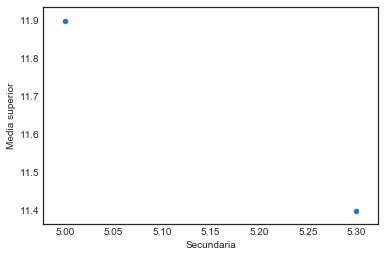

In [214]:
df1_sample['Secundaria'] = df1_sample['Secundaria'].astype('float64')

df1_sample.plot(kind='scatter',x='Secundaria',y='Media superior')

## Histograms

Text(0.5, 1.0, 'Frequency of Media superior')

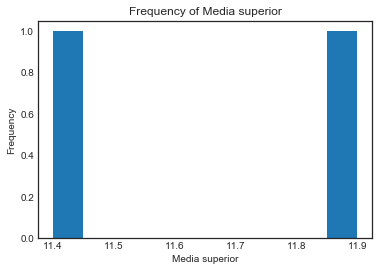

In [216]:
plt.hist(df1_sample['Media superior'])
plt.xlabel('Media superior')
plt.ylabel('Frequency')
plt.title('Frequency of Media superior')

Text(0.5, 1.0, 'Frequency of Primaria')

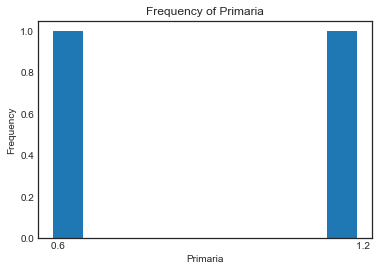

In [217]:
plt.hist(df1_sample['Primaria'])
plt.xlabel('Primaria')
plt.ylabel('Frequency')
plt.title('Frequency of Primaria')

## Boxplots

Text(0.5, 1.0, 'Media superior')

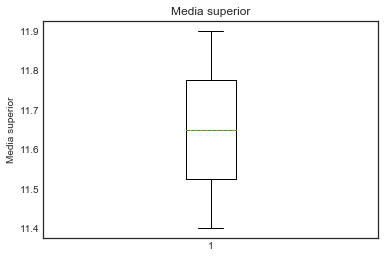

In [220]:
plt.boxplot(df1_sample['Media superior'], showmeans=True, meanline=True)
plt.ylabel('Media superior')
plt.title('Media superior')

# Datos de la tasa de casos nuevos de depresión

In [224]:
path2 = 'Tasa de casos nuevos de depresion .csv'
df2 = pd.read_csv(path2)
df2.head()

,Entidad federativa,2014,2015,2016,2017,2018
0,Aguascalientes,78.81,170.62,239.13,225.13,107.32
1,Baja California,80.46,79.93,82.86,107.68,144.81
2,Baja California Sur,117.67,117.55,104.97,133.85,112.67
3,Campeche,78.29,102.99,131.74,141.60,139.15
4,Coahuila de Zaragoza,66.24,24.29,21.53,61.23,31.23


In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
Entidad federativa    32 non-null object
2014                  32 non-null float64
2015                  32 non-null float64
2016                  32 non-null float64
2017                  32 non-null float64
2018                  32 non-null float64
dtypes: float64(5), object(1)
memory usage: 1.6+ KB


In [226]:
df2.shape

(32, 6)

In [228]:
df2.shape[0]

32

In [229]:
df2.shape[1]

6

In [230]:
df2.columns.values.tolist()

['Entidad federativa', '2014', '2015', '2016', '2017', '2018']

In [231]:
df2.dtypes

Entidad federativa     object
2014                  float64
2015                  float64
2016                  float64
2017                  float64
2018                  float64
dtype: object

In [232]:
df2.isnull().any().any()

False

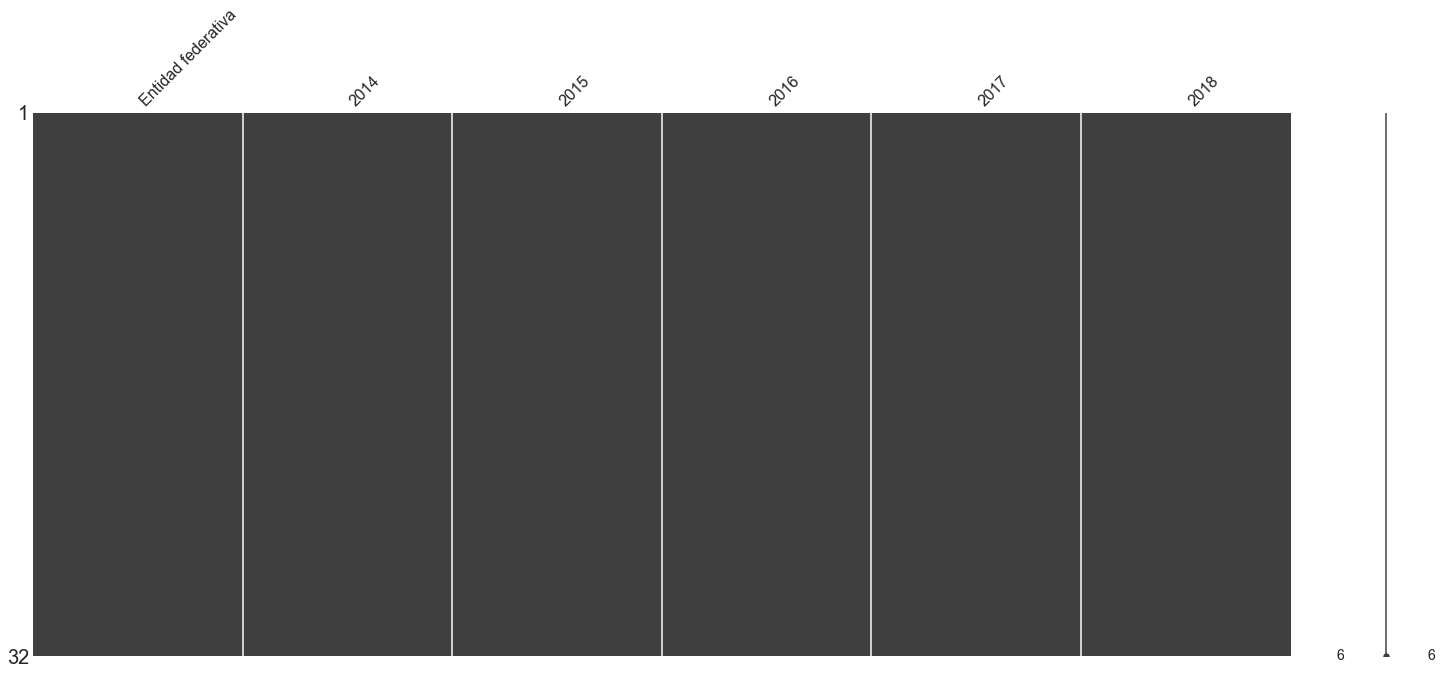

In [233]:
msno.matrix(df2)

In [234]:
df2.replace({' ': np.nan}, inplace=True)

In [235]:
df2.isnull().any().any()

False

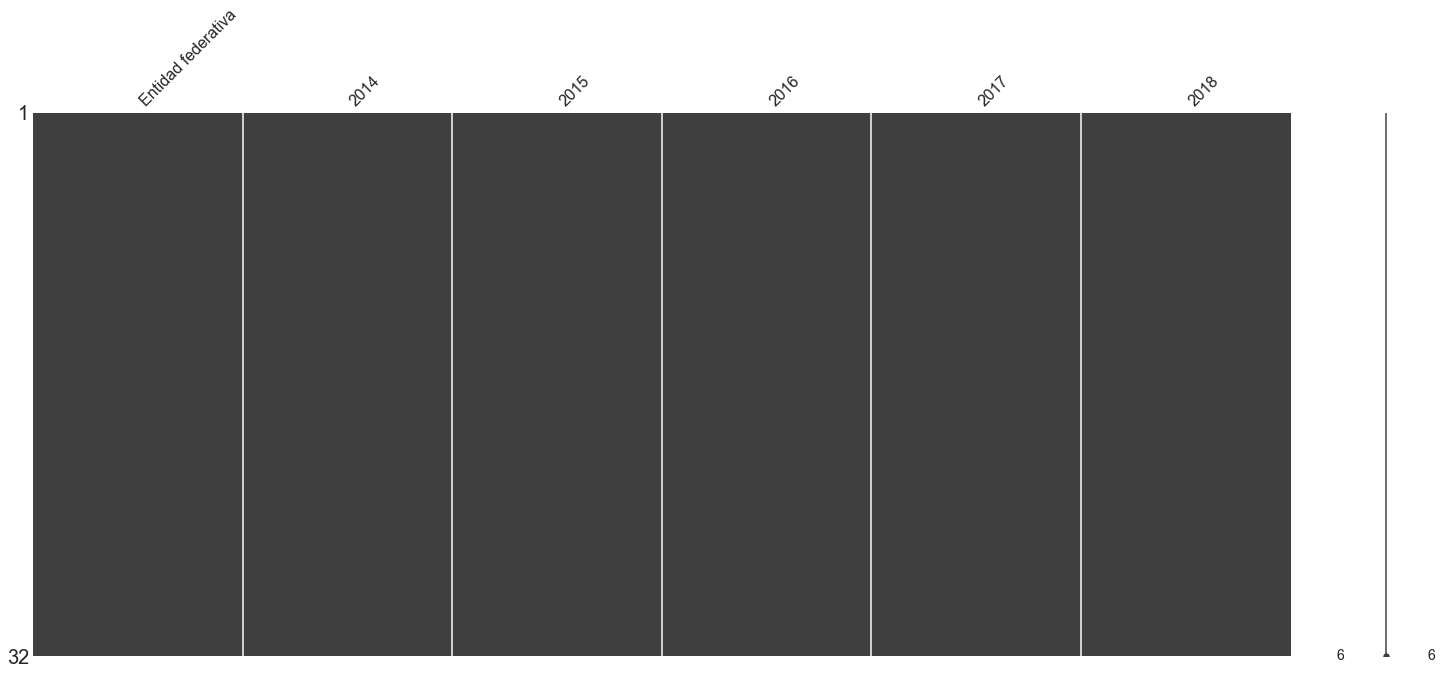

In [236]:
msno.matrix(df2)

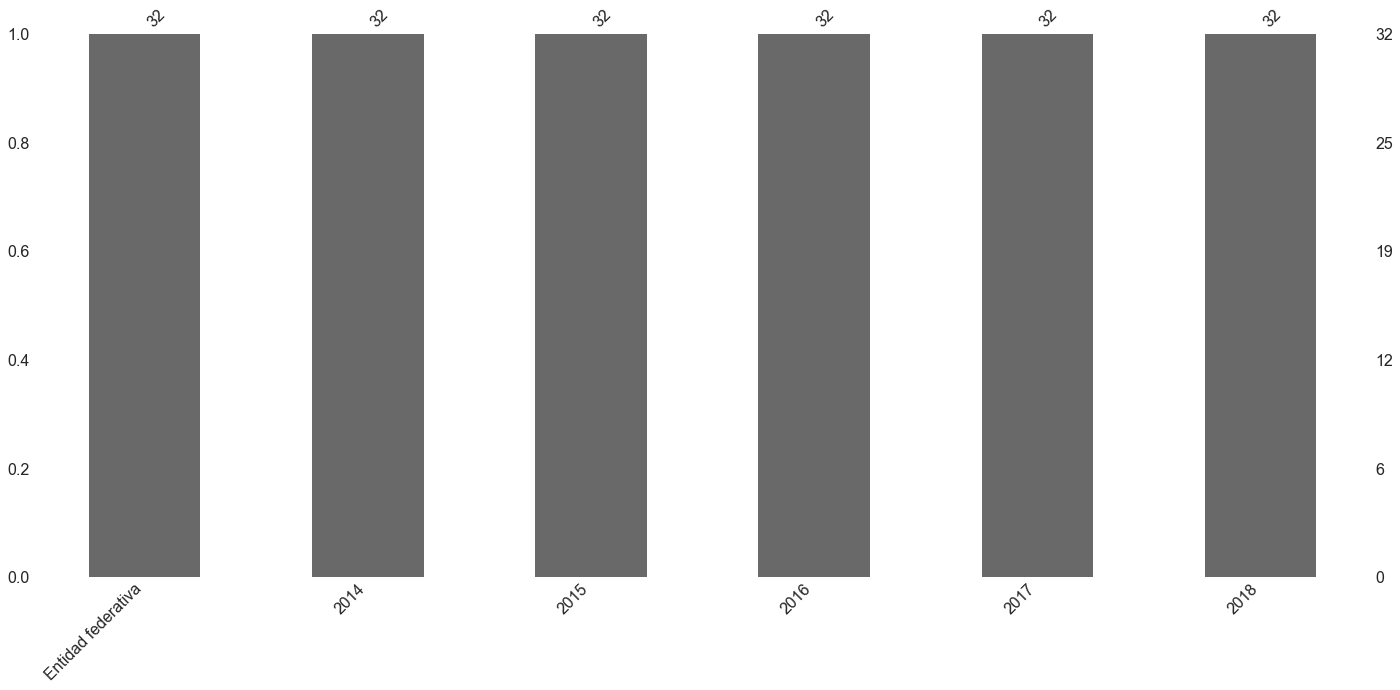

In [237]:
msno.bar(df2)

In [238]:
df2.columns[df2.isnull().any()].tolist()

[]

In [239]:
df2.describe()

,2014,2015,2016,2017,2018
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,66.978125,90.121875,95.040625,111.029062,107.488750
std,41.714378,55.852810,62.707415,64.102033,67.933946
min,7.490000,17.960000,21.530000,32.590000,29.260000
25%,33.567500,52.032500,51.272500,60.257500,52.370000
50%,59.320000,69.030000,69.425000,98.970000,89.725000
75%,85.692500,120.647500,123.245000,135.915000,140.565000
max,148.910000,262.760000,260.520000,268.820000,295.760000


In [240]:
df2.loc[[0]]

,Entidad federativa,2014,2015,2016,2017,2018
0,Aguascalientes,78.81,170.62,239.13,225.13,107.32


In [243]:
df2["2018"].loc[[28]]

28    50.45
Name: 2018, dtype: float64

In [244]:
df2["2016"].loc[[0]]

0    239.13
Name: 2016, dtype: float64

In [245]:
df2[["2014", "2018"]].loc[[0]]

,2014,2018
0,78.81,107.32


In [246]:
df2.loc[30:33]

,Entidad federativa,2014,2015,2016,2017,2018
30,Yucatán,70.91,69.99,58.53,111.14,84.55
31,Zacatecas,62.11,65.73,66.73,102.97,101.32


In [247]:
df2.drop([0,1,4], axis=0).head()

,Entidad federativa,2014,2015,2016,2017,2018
2,Baja California Sur,117.67,117.55,104.97,133.85,112.67
3,Campeche,78.29,102.99,131.74,141.60,139.15
5,Colima,117.72,150.11,151.14,181.33,196.23
6,Chiapas,27.40,22.25,25.44,32.59,29.26
7,Chihuahua,135.71,172.74,228.28,268.82,295.76


In [248]:
df2.drop(df2.index[1:5], axis=0).head(10)

,Entidad federativa,2014,2015,2016,2017,2018
0,Aguascalientes,78.81,170.62,239.13,225.13,107.32
5,Colima,117.72,150.11,151.14,181.33,196.23
6,Chiapas,27.40,22.25,25.44,32.59,29.26
7,Chihuahua,135.71,172.74,228.28,268.82,295.76
8,Ciudad de México,148.91,191.11,192.61,203.51,204.59
9,Durango,135.22,262.76,260.52,250.26,242.75
10,Guanajuato,7.49,17.96,37.69,46.25,48.93
11,Guerrero,8.74,56.86,47.63,53.06,48.02
12,Hidalgo,56.53,58.61,72.12,79.94,73.15
13,Jalisco,52.26,107.98,114.30,133.83,124.80


In [249]:
df2[10:].head()

,Entidad federativa,2014,2015,2016,2017,2018
10,Guanajuato,7.49,17.96,37.69,46.25,48.93
11,Guerrero,8.74,56.86,47.63,53.06,48.02
12,Hidalgo,56.53,58.61,72.12,79.94,73.15
13,Jalisco,52.26,107.98,114.30,133.83,124.80
14,México,36.12,39.84,47.71,57.34,53.01


In [256]:
df2["2018"].values

array([107.32, 144.81, 112.67, 139.15,  31.23, 196.23,  29.26, 295.76,
       204.59, 242.75,  48.93,  48.02,  73.15, 124.8 ,  53.01,  94.9 ,
       115.17, 243.86,  72.34,  40.18,  38.96,  47.23,  72.39, 118.54,
       146.94,  73.53,  58.94, 153.13,  50.45,  75.53,  84.55, 101.32])

In [251]:
df2[['2014', "2018"]].values

array([[19. , 20. ],
       [ 8.5,  5.2],
       [15.2, 12. ],
       [19.9, 15.2],
       [ 9.3, 16.7],
       [ 9.7,  5.4],
       [15.2,  9.5],
       [ 8.8,  9.5],
       [11. ,  6. ],
       [ 8.5, 13. ],
       [14.6,  8.9],
       [ 2.7,  2. ],
       [ 9.4,  7.9],
       [11.6, 11.4],
       [ 8.4,  7. ],
       [ 6.5,  6.2],
       [ 5.4,  6. ],
       [11.2,  7.4],
       [10.2, 12.8],
       [ 5.9,  6.3],
       [ 9.7, 10.4],
       [ 9.1, 14. ],
       [18.2,  9.1],
       [12. , 11.7],
       [ 5.4,  5.5],
       [11.5, 12.3],
       [11.6, 10.4],
       [ 7.3,  7.2],
       [ 9.6,  9.4],
       [ 7.9,  6.9],
       [22.7, 27. ],
       [ 7. ,  6.7]])

In [254]:
df2["2018"].unique()

array([107.32, 144.81, 112.67, 139.15,  31.23, 196.23,  29.26, 295.76,
       204.59, 242.75,  48.93,  48.02,  73.15, 124.8 ,  53.01,  94.9 ,
       115.17, 243.86,  72.34,  40.18,  38.96,  47.23,  72.39, 118.54,
       146.94,  73.53,  58.94, 153.13,  50.45,  75.53,  84.55, 101.32])

In [257]:
df2["2018"].nunique()

32

In [259]:
df2["2018"].value_counts()

115.17    1
118.54    1
75.53     1
53.01     1
101.32    1
112.67    1
47.23     1
295.76    1
31.23     1
50.45     1
58.94     1
40.18     1
72.39     1
73.53     1
94.90     1
72.34     1
153.13    1
196.23    1
146.94    1
29.26     1
144.81    1
107.32    1
124.80    1
139.15    1
48.93     1
243.86    1
204.59    1
73.15     1
84.55     1
48.02     1
38.96     1
242.75    1
Name: 2018, dtype: int64

In [260]:
df2.agg(['count', 'size', 'nunique'])

,Entidad federativa,2014,2015,2016,2017,2018
count,32,32,32,32,32,32
size,32,32,32,32,32,32
nunique,32,32,32,32,32,32


In [261]:
df2.groupby('2018').agg(['count', 'size', 'nunique']).stack()

Entidad federativa  2014  2015  2016  2017
2018                                                      
29.26  count                     1     1     1     1     1
       size                      1     1     1     1     1
       nunique                   1     1     1     1     1
31.23  count                     1     1     1     1     1
       size                      1     1     1     1     1
...                            ...   ...   ...   ...   ...
243.86 size                      1     1     1     1     1
       nunique                   1     1     1     1     1
295.76 count                     1     1     1     1     1
       size                      1     1     1     1     1
       nunique                   1     1     1     1     1

[96 rows x 5 columns]

In [262]:
df2.groupby('2018').agg(['count', 'size', 'nunique'])

Entidad federativa               2014               2015               \
                    count size nunique count size nunique count size nunique   
2018                                                                           
29.26                   1    1       1     1    1       1     1    1       1   
31.23                   1    1       1     1    1       1     1    1       1   
38.96                   1    1       1     1    1       1     1    1       1   
40.18                   1    1       1     1    1       1     1    1       1   
47.23                   1    1       1     1    1       1     1    1       1   
48.02                   1    1       1     1    1       1     1    1       1   
48.93                   1    1       1     1    1       1     1    1       1   
50.45                   1    1       1     1    1       1     1    1       1   
53.01                   1    1       1     1    1       1     1    1       1   
58.94                   1    1       1     1    1       1     1    1       1   
72.34                   1    1       1     1    1       1     1    1       1   
72.39                   1    1       1     1    1       1     1    1       1   
73.15                   1    1       1     1    1       1     1    1       1   
73.53                   1    1       1     1    1       1     1    1       1   
75.53                   1    1       1     1    1       1     1    1       1   
84.55                   1    1       1     1    1       1     1    1       1   
94.90                   1    1       1     1    1       1     1    1       1   
101.32                  1    1       1     1    1       1     1    1       1   
107.32                  1    1       1     1    1       1     1    1       1   
112.67                  1    1       1     1    1       1     1    1       1   
115.17                  1    1       1     1    1       1     1    1       1   
118.54                  1    1       1     1    1       1     1    1       1   
124.80                  1    1       1     1    1       1     1    1       1   
139.15                  1    1       1     1    1       1     1    1       1   
144.81                  1    1       1     1    1       1     1    1       1   
146.94                  1    1       1     1    1       1     1    1       1   
153.13                  1    1       1     1    1       1     1    1       1   
196.23                  1    1       1     1    1       1     1    1       1   
204.59                  1    1       1     1    1       1     1    1       1   
242.75                  1    1       1     1    1       1     1    1       1   
243.86                  1    1       1     1    1       1     1    1       1   
295.76                  1    1       1     1    1       1     1    1       1   

        2016               2017               
       count size nunique count size nunique  
2018                                          
29.26      1    1       1     1    1       1  
31.23      1    1       1     1    1       1  
38.96      1    1       1     1    1       1  
40.18      1    1       1     1    1       1  
47.23      1    1       1     1    1       1  
48.02      1    1       1     1    1       1  
48.93      1    1       1     1    1       1  
50.45      1    1       1     1    1       1  
53.01      1    1       1     1    1       1  
58.94      1    1       1     1    1       1  
72.34      1    1       1     1    1       1  
72.39      1    1       1     1    1       1  
73.15      1    1       1     1    1       1  
73.53      1    1       1     1    1       1  
75.53      1    1       1     1    1       1  
84.55      1    1       1     1    1       1  
94.90      1    1       1     1    1       1  
101.32     1    1       1     1    1       1  
107.32     1    1       1     1    1       1  
112.67     1    1       1     1    1       1  
115.17     1    1       1     1    1       1  
118.54     1    1       1     1    1       1  
124.80     1    1       1     1

In [264]:
df2_sample = df2.sample(frac=0.05, random_state=1)
df2_sample.head()

,Entidad federativa,2014,2015,2016,2017,2018
27,Tamaulipas,52.47,126.15,122.43,156.96,153.13
3,Campeche,78.29,102.99,131.74,141.60,139.15


In [265]:
df2.shape

(32, 6)

In [266]:
df2_sample.shape

(2, 6)

## Data Transform

In [267]:
df2_dropped = df2.dropna(subset=['2018'])
df2_dropped.head()

,Entidad federativa,2014,2015,2016,2017,2018
0,Aguascalientes,78.81,170.62,239.13,225.13,107.32
1,Baja California,80.46,79.93,82.86,107.68,144.81
2,Baja California Sur,117.67,117.55,104.97,133.85,112.67
3,Campeche,78.29,102.99,131.74,141.60,139.15
4,Coahuila de Zaragoza,66.24,24.29,21.53,61.23,31.23


In [268]:
df2_dropped.shape

(32, 6)

In [269]:
df2_copy = df2.copy()
df2_copy.head()

,Entidad federativa,2014,2015,2016,2017,2018
0,Aguascalientes,78.81,170.62,239.13,225.13,107.32
1,Baja California,80.46,79.93,82.86,107.68,144.81
2,Baja California Sur,117.67,117.55,104.97,133.85,112.67
3,Campeche,78.29,102.99,131.74,141.60,139.15
4,Coahuila de Zaragoza,66.24,24.29,21.53,61.23,31.23


In [270]:
df2_copy.shape

(32, 6)

In [271]:
df2_dropped['2018'].dtype

dtype('float64')

In [272]:
df2_dropped['2018'].mean() 

107.48875000000002

In [273]:
df2_copy['2018'].fillna(value=np.round(df2['2018'].mean(),decimals=0), inplace=True)

In [274]:
df2_copy.agg(['count', 'size', 'nunique'])

,Entidad federativa,2014,2015,2016,2017,2018
count,32,32,32,32,32,32
size,32,32,32,32,32,32
nunique,32,32,32,32,32,32


## Data Summarization

In [275]:
df2_copy['2018'].mean()

107.48875000000002

In [277]:
df2_copy['2018'][df2_copy['2014'] == 6]

Series([], Name: 2018, dtype: float64)

In [280]:
df2_copy['2014'][df2_copy['2018'] == 6].mean()

nan

In [281]:
df2_copy.groupby(["2014", "2015", "2016", "2017"]).count()

,,,,Entidad federativa,2018
2014,2015,2016,2017,,
7.49,17.96,37.69,46.25,1,1
8.74,56.86,47.63,53.06,1,1
14.36,46.08,38.82,44.63,1,1
16.44,56.12,62.95,73.83,1,1
22.26,45.32,38.76,41.16,1,1
23.70,52.63,52.46,43.91,1,1
27.40,22.25,25.44,32.59,1,1
32.09,33.92,36.73,37.99,1,1
34.06,55.50,66.61,75.75,1,1


In [282]:
df2_copy.groupby(["2014", "2015", "2016", "2016"]).count()

,,,,Entidad federativa,2017,2018
2014,2015,2016,2016,,,
7.49,17.96,37.69,37.69,1,1,1
8.74,56.86,47.63,47.63,1,1,1
14.36,46.08,38.82,38.82,1,1,1
16.44,56.12,62.95,62.95,1,1,1
22.26,45.32,38.76,38.76,1,1,1
23.70,52.63,52.46,52.46,1,1,1
27.40,22.25,25.44,25.44,1,1,1
32.09,33.92,36.73,36.73,1,1,1
34.06,55.50,66.61,66.61,1,1,1


In [283]:
df2_copy.groupby(["2014", "2015"])[["2016", "2017"]].count()

,,2016,2017
2014,2015,,
7.49,17.96,1,1
8.74,56.86,1,1
14.36,46.08,1,1
16.44,56.12,1,1
22.26,45.32,1,1
23.70,52.63,1,1
27.40,22.25,1,1
32.09,33.92,1,1
34.06,55.50,1,1


In [285]:
df2_copy["2018"]

0     107.32
1     144.81
2     112.67
3     139.15
4      31.23
5     196.23
6      29.26
7     295.76
8     204.59
9     242.75
10     48.93
11     48.02
12     73.15
13    124.80
14     53.01
15     94.90
16    115.17
17    243.86
18     72.34
19     40.18
20     38.96
21     47.23
22     72.39
23    118.54
24    146.94
25     73.53
26     58.94
27    153.13
28     50.45
29     75.53
30     84.55
31    101.32
Name: 2018, dtype: float64

In [286]:
df2_sample = df2.sample(frac=0.05, random_state=1)
df2_sample.head()

,Entidad federativa,2014,2015,2016,2017,2018
27,Tamaulipas,52.47,126.15,122.43,156.96,153.13
3,Campeche,78.29,102.99,131.74,141.60,139.15


In [288]:
df2_sample.groupby(["2014", "2015"])[["2016", "2017"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

2016                          2017                      
                 sum    mean count_nonzero     sum    mean count_nonzero
2014  2015                                                              
52.47 126.15  122.43  122.43           1.0  156.96  156.96           1.0
78.29 102.99  131.74  131.74           1.0  141.60  141.60           1.0

In [289]:
df2_sample.groupby(["2014", "2015"]).agg({'2016':np.mean,'2017':np.max})

,,2016,2017
2014,2015,,
52.47,126.15,122.43,156.96
78.29,102.99,131.74,141.60


## Data Visualization

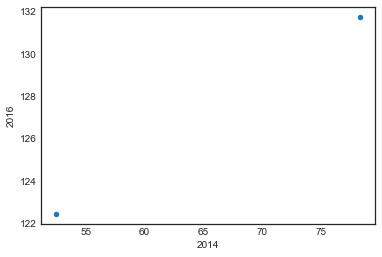

In [292]:
df2_sample['2014'] = df2_sample['2014'].astype('float64')

df2_sample.plot(kind='scatter',x='2014',y='2016')

## Histograms

Text(0.5, 1.0, 'Frequency of 2014')

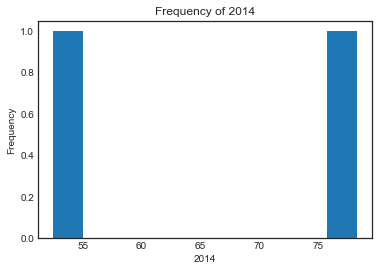

In [295]:
plt.hist(df2_sample['2014'])
plt.xlabel('2014')
plt.ylabel('Frequency')
plt.title('Frequency of 2014')

Text(0.5, 1.0, 'Frequency of 2016')

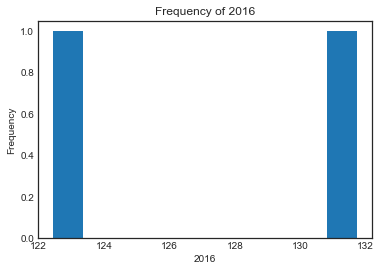

In [297]:
plt.hist(df2_sample['2016'])
plt.xlabel('2016')
plt.ylabel('Frequency')
plt.title('Frequency of 2016')

## Boxplots

Text(0.5, 1.0, 'Box Plot of 2015 count')

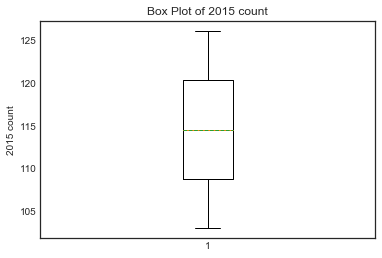

In [298]:
plt.boxplot(df2_sample['2015'], showmeans=True, meanline=True)
plt.ylabel('2015 count')
plt.title('Box Plot of 2015 count')